# HANDSON 1

Bagus Ardin Saputra (120140186)


In [106]:
import matplotlib.pyplot as plt
import librosa as ls
import numpy as np
import wave
import os

Import library


In [107]:
lsdisplay = ls.display

Untuk mempermudah penulisan sintaks, saya mendefinisikan modul `display` dari `librosa` kedalam variabel `lsdisplay`


### Memuat Path Dataset

Dataset yang saya gunakan adalah dataset asli yang saya rekam dengan suara saya sendiri. Selain pada direktori proyek ini, dataset yang saya gunakan dapat diunduh pada [tautan ini](https://www.kaggle.com/datasets/ardinnn/data-ho-1/data).


In [108]:
datasets = []
for i in os.listdir('data_ho_1'):
    datasets.append(f'data_ho_1/{i}')

datasets


['data_ho_1/ho_1_type_1.wav',
 'data_ho_1/ho_1_type_2.wav',
 'data_ho_1/ho_1_type_3.wav',
 'data_ho_1/ho_1_type_4.wav',
 'data_ho_1/ho_1_type_5.wav']

Pada blok diatas, saya memuat keseluruhan path dari dataset dan menyimpannya kedalam list `datasets`.


### Memuat Data Audio


In [109]:
audio_data = []
for i in datasets:
    with wave.open(i, 'r') as wav_file:
        frames = wav_file.readframes(-1)
        data = np.frombuffer(frames, dtype='int16')
        sampling = wav_file.getframerate()
        channels = wav_file.getnchannels()

        audio_data.append({ 'data': data, 'sampling': sampling, 'channels': channels })

Saya memuat semua file audio dan menyimpannya kedalam list `audio_data`. List ini memuat data, sampling rate, dan channel dari setiap dataset audio yang saya gunakan. Hasil dari file audio yang sudah dimuat dapat dilihat di bawah.


In [110]:
for i in range(len(audio_data)):
    print(f'Data Audio {i+1}: {audio_data[i]['data']}')
    print(f'Panjang Data Audio {i+1}: {len(audio_data[i]['data'])}')
    print(f'Sampling Rate Audio {i+1}: {audio_data[i]['sampling']}')
    print(f'Channel Audio {i+1}: {audio_data[i]['channels']}')
    print()

Data Audio 1: [0 0 0 ... 0 0 0]
Panjang Data Audio 1: 526554
Sampling Rate Audio 1: 44100
Channel Audio 1: 2

Data Audio 2: [0 0 0 ... 0 0 0]
Panjang Data Audio 2: 464814
Sampling Rate Audio 2: 44100
Channel Audio 2: 2

Data Audio 3: [0 0 0 ... 0 0 0]
Panjang Data Audio 3: 483336
Sampling Rate Audio 3: 44100
Channel Audio 3: 2

Data Audio 4: [0 0 0 ... 0 0 0]
Panjang Data Audio 4: 656208
Sampling Rate Audio 4: 44100
Channel Audio 4: 2

Data Audio 5: [0 0 0 ... 0 0 0]
Panjang Data Audio 5: 751464
Sampling Rate Audio 5: 44100
Channel Audio 5: 2



### Membagi Audio Berdasarkan Channel


In [111]:
audio_channel = []
for i in range(len(audio_data)):
    audio_data[i]['data'] = audio_data[i]['data'].reshape(-1, audio_data[i]['channels'])
    print(audio_data[i]['data'].shape)

    left = audio_data[i]['data'][:, 0]
    right = audio_data[i]['data'][:, 1]

    audio_channel.append({
        'kiri': left,
        'kanan': right
    })

(263277, 2)
(232407, 2)
(241668, 2)
(328104, 2)
(375732, 2)


Dalam percobaan ini, data audio yang saya gunakan memiliki 2 channel. Hal ini ditandai dengan nilai dari data audio yang memiliki nilai positif menandakan bahwa audio berada di channel kanan, sedangkan nilai negatif yang menandakan bahwa audio berada di channel kiri, atau lebih mudahnya kita dapat melihat jumlah channel yang tertera dari hasil audio yang telah dimuat sebelumnya dengan library `wave`. Sebelum dapat diproses dan divisualisasikan, data audio haruslah dipisah terlebih dahulu sesuai dengan channelnya masing-masing. Hal ini bertujuan agar saat data audio ditampilkan dapat lebih rapih dan mudah di analisa.


In [112]:
n = 1
for i in audio_channel:
    print(f'Channel Kiri Audio {n}: {i['kiri']}')
    print(f'Panjang Channel Kiri Audio {n}: {len(i['kiri'])}')
    print(f'Channel Kanan Audio {n}: {i['kiri']}')
    print(f'Panjang Channel Kanan Audio {n}: {len(i['kiri'])}')
    print()
    n+=1

Channel Kiri Audio 1: [0 0 0 ... 0 0 0]
Panjang Channel Kiri Audio 1: 263277
Channel Kanan Audio 1: [0 0 0 ... 0 0 0]
Panjang Channel Kanan Audio 1: 263277

Channel Kiri Audio 2: [0 0 0 ... 0 0 0]
Panjang Channel Kiri Audio 2: 232407
Channel Kanan Audio 2: [0 0 0 ... 0 0 0]
Panjang Channel Kanan Audio 2: 232407

Channel Kiri Audio 3: [0 0 0 ... 0 0 0]
Panjang Channel Kiri Audio 3: 241668
Channel Kanan Audio 3: [0 0 0 ... 0 0 0]
Panjang Channel Kanan Audio 3: 241668

Channel Kiri Audio 4: [0 0 0 ... 0 0 0]
Panjang Channel Kiri Audio 4: 328104
Channel Kanan Audio 4: [0 0 0 ... 0 0 0]
Panjang Channel Kanan Audio 4: 328104

Channel Kiri Audio 5: [0 0 0 ... 0 0 0]
Panjang Channel Kiri Audio 5: 375732
Channel Kanan Audio 5: [0 0 0 ... 0 0 0]
Panjang Channel Kanan Audio 5: 375732



Setelah channel audio dipisah, panjang data audio kini berubah disetiap channelnya. Setiap channel (kanan dan kiri) dapat dikatakan merupakan separuh nilai dari panjang data audio sebelum dipisahkan. Sebagai contoh pada audio 1, sebelumnya memiliki data sepanjang `1537920`, sedangkan setelah dilakukan pemisahan channel, didapatkan nilai pada channel kiri audio 1 sepanjang `768960` dan kanan `768960`. Jika kita menjumlahkan nilai panjang dari setiap channel ini akan menghasilkan nilai panjang semula dari data audio sebelum dilakukan pemisahan channel.


# Visualisasi Audio


In [113]:
def visualize(time_axis, left_audio, right_audio, x_figsize, audio_number):
    ax, fig = plt.subplots(2, 1, figsize=(x_figsize, 5))
    fig[0].plot(time_axis, left_audio, label='Kiri')
    fig[0].set_title(f'Waveform Audio {audio_number} Kiri')
    fig[0].set_xlabel('Waktu (Detik)')
    fig[1].plot(time_axis, right_audio, label='Kiri')
    fig[1].set_title(f'Waveform Audio {audio_number} Kanan')
    fig[1].set_xlabel('Waktu (Detik)')
    plt.tight_layout()
    plt.show()

Karena percobaan dilakukan secara bersamaan dengan menjalankan total sebanyak 5 dataset, maka saya memilih untuk menggunakan membuat plot dalam bentuk fungsi yang saya namakan dengan `visualize()`. Fungsi yang saya buat menerima beberapa paramter yaitu:


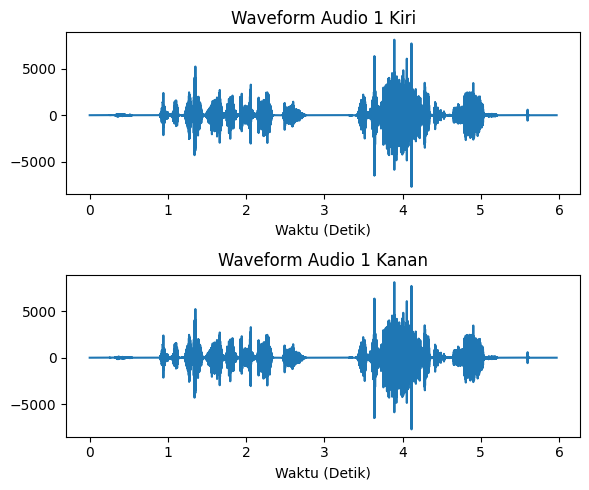

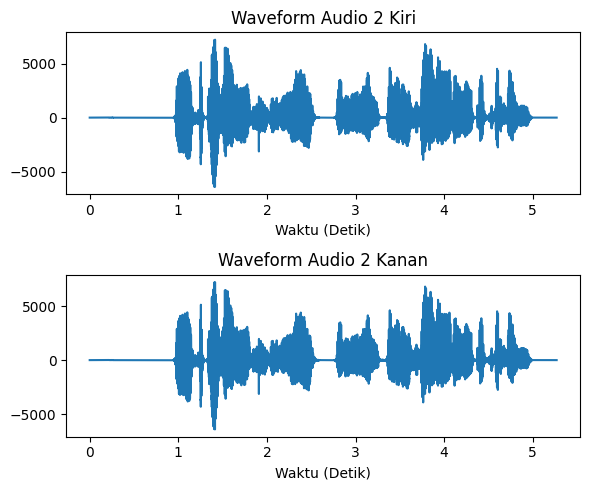

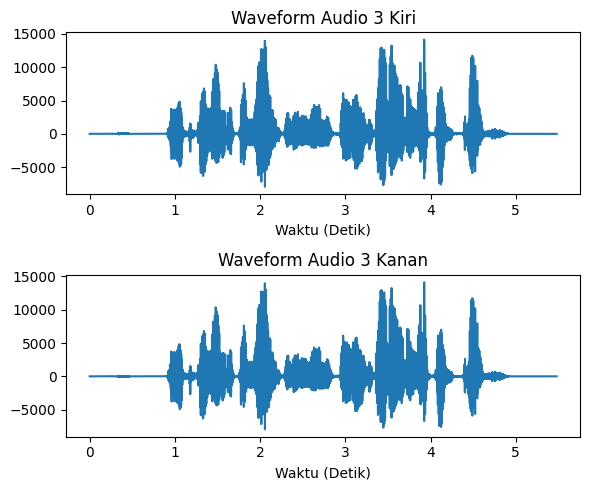

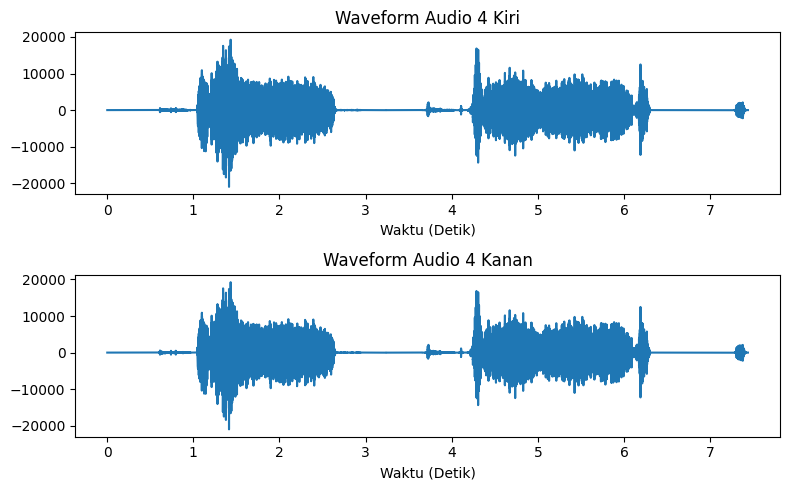

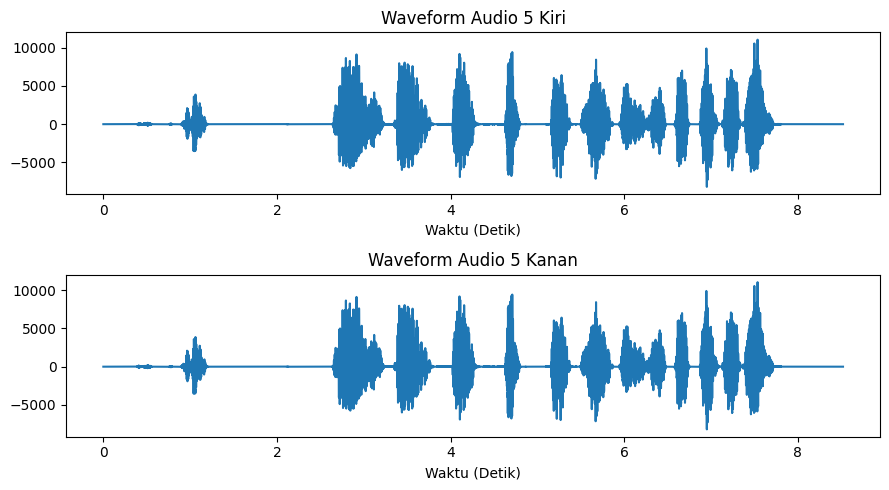

In [114]:
import math

for i in range(len(audio_data)):
    time_axis = np.linspace(0, len(audio_channel[i]['kiri'])/audio_data[i]['sampling'], len(audio_channel[i]['kiri']))
    x_figsize = math.ceil(len(audio_channel[i]['kiri'])/audio_data[i]['sampling'])
    visualize(time_axis, audio_channel[i]['kiri'], audio_channel[i]['kanan'], x_figsize, i+1)


### Analisis Singkat Hasil Percobaan

1. Pada percobaan dengan mengunakan Audio pertama (Volume Relatif Rendah), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -5000>x>10000
   ```
2. Pada percobaan dengan mengunakan Audio pertama (Volume Relatif Sedang), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -5000>x>10000
   ```
3. Pada percobaan dengan mengunakan Audio pertama (Volume Relatif Keras), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -5000>x>15000
   ```
4. Pada percobaan dengan mengunakan Audio pertama (Dominan dengan bunyi huruf "s"), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -20000>x>20000
   ```
5. Pada percobaan dengan mengunakan Audio pertama (Dominan _lip trill_), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -5000>x>10000
   ```

Hasil analisa singkat ini hanya sekedar kesimpulan yang diambil berdasarkan visualisasi data audio yang telah dihasilkan sebelumnya. Untuk hasil analisa yang lebih mendetail, saya memumutuskan untuk menambah blok kode baru dengan tujuan untuk mendapatkan rata-rata dari masing-masing frekuensi audio. Hal ini bertujuan untuk mengetahui dengan pasti perbedaan yang dihasilkan dari masing-masing kriteria data percobaan yang digunakan.
